Importing library, csv dataset and preprocessing

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
s=pd.read_csv('data.csv')

In [32]:
s.head()

,Sample Number,X1,X2,X3,Y2,Z1
0,1.0,50.0,6.0,30.0,4.86,18.0
1,2.0,50.0,6.0,45.0,4.97,19.0
2,3.0,50.0,6.0,60.0,5.79,20.0
3,4.0,50.0,6.0,75.0,6.28,27.0
4,5.0,50.0,8.0,30.0,5.06,19.0


In [33]:
s.describe()

,Sample Number,X1,X2,X3,Y2,Z1
count,64.000000,66.000000,64.000000,64.000000,64.000000,64.000000
mean,32.500000,125.000000,9.000000,52.500000,7.531719,30.687500
std,18.618987,57.008771,2.253745,16.903085,1.299308,6.647293
min,1.000000,50.000000,6.000000,30.000000,4.860000,18.000000
25%,16.750000,62.500000,7.500000,41.250000,6.947500,25.750000
50%,32.500000,125.000000,9.000000,52.500000,7.210000,32.000000
75%,48.250000,187.500000,10.500000,63.750000,8.702500,35.250000
max,64.000000,200.000000,12.000000,75.000000,10.130000,44.000000


In [34]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sample Number  64 non-null     float64
 1   X1             66 non-null     float64
 2   X2             64 non-null     float64
 3   X3             64 non-null     float64
 4   Y2             64 non-null     float64
 5   Z1             64 non-null     float64
dtypes: float64(6)
memory usage: 3.5 KB


In [35]:
s.drop(['Sample Number'],axis=1,inplace=True)

Check and remove null values

In [36]:
s.isna()

,X1,X2,X3,Y2,Z1
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
66,True,True,True,True,True
67,True,True,True,True,True
68,True,True,True,True,True
69,False,True,True,True,True


In [37]:
s.dropna(axis='rows', how='any', inplace=True)
s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      64 non-null     float64
 1   X2      64 non-null     float64
 2   X3      64 non-null     float64
 3   Y2      64 non-null     float64
 4   Z1      64 non-null     float64
dtypes: float64(5)
memory usage: 3.0 KB


In [38]:
s.drop_duplicates()

,X1,X2,X3,Y2,Z1
0,50.0,6.0,30.0,4.86,18.0
1,50.0,6.0,45.0,4.97,19.0
2,50.0,6.0,60.0,5.79,20.0
3,50.0,6.0,75.0,6.28,27.0
4,50.0,8.0,30.0,5.06,19.0
...,...,...,...,...,...
59,200.0,10.0,75.0,9.53,37.0
60,200.0,12.0,30.0,8.08,39.0
61,200.0,12.0,45.0,8.95,44.0
62,200.0,12.0,60.0,8.86,43.0


1.Normalize the values. Mention the normalization method followed.

In [39]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [40]:
norm=mms.fit_transform(s)

In [41]:
normd=pd.DataFrame(norm,columns=s.columns)

In [42]:
s=normd
s.head()

,X1,X2,X3,Y2,Z1
0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000000,0.333333,0.020873,0.038462
2,0.0,0.000000,0.666667,0.176471,0.076923
3,0.0,0.000000,1.000000,0.269450,0.346154
4,0.0,0.333333,0.000000,0.037951,0.038462


In [43]:
s.describe()

,X1,X2,X3,Y2,Z1
count,64.000000,64.000000,64.000000,64.000000,64.000000
mean,0.500000,0.500000,0.500000,0.506968,0.487981
std,0.375624,0.375624,0.375624,0.246548,0.255665
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.250000,0.396110,0.298077
50%,0.500000,0.500000,0.500000,0.445920,0.538462
75%,0.750000,0.750000,0.750000,0.729127,0.663462
max,1.000000,1.000000,1.000000,1.000000,1.000000


## stage 1:

 Find the correlation between the explanatory variables (x1, x2 and x3):

In [44]:
i=s.drop(['Y2','Z1'],axis=1)

In [45]:
i.corr()

,X1,X2,X3
X1,1.000000e+00,1.811051e-16,7.494005e-17
X2,1.811051e-16,1.000000e+00,6.245005e-18
X3,7.494005e-17,6.245005e-18,1.000000e+00


<AxesSubplot:>

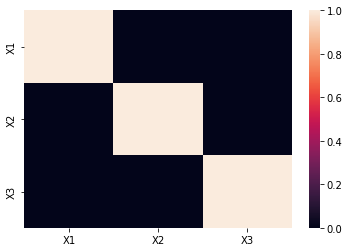

In [46]:
sns.heatmap(i.corr())

Find the correlation between the explanatory variables and the response variable (y2)

In [47]:
j=s.drop(['Z1'],axis=1)

In [48]:
j.head()

,X1,X2,X3,Y2
0,0.0,0.000000,0.000000,0.000000
1,0.0,0.000000,0.333333,0.020873
2,0.0,0.000000,0.666667,0.176471
3,0.0,0.000000,1.000000,0.269450
4,0.0,0.333333,0.000000,0.037951


In [49]:
tb=j.corr()

<AxesSubplot:>

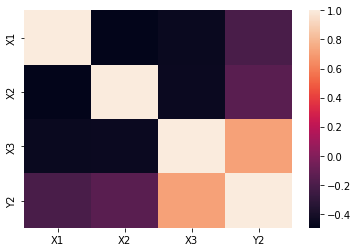

In [50]:
sns.heatmap(tb.corr())

Listing out variable names

In [51]:
ttb=tb["Y2"]
tttb=ttb.drop(["Y2"])
tttb

X1    0.374505
X2    0.392176
X3    0.662444
Name: Y2, dtype: float64

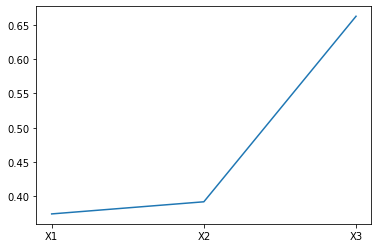

In [52]:
plt.plot(tttb.index,tttb)

 stage 2

Find correlation between he explanatory variables and individual response variables (z1)

In [54]:
i=i.drop(["Y2"], axis=1)
i.corr()

KeyError: "['Y2'] not found in axis"

<AxesSubplot:>

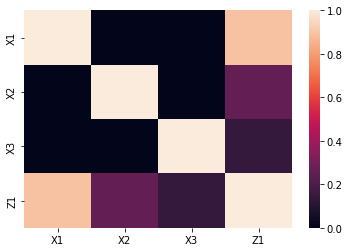

In [ ]:
sns.heatmap(i.corr())

Listing out variable names

In [ ]:
tb=i.corr()
ttb=tb.drop(['Z1'])
tttb=ttb['Z1']
tttb

X1    0.894236
X2    0.254285
X3    0.137738
Name: Z1, dtype: float64

Presenting the inference graphically

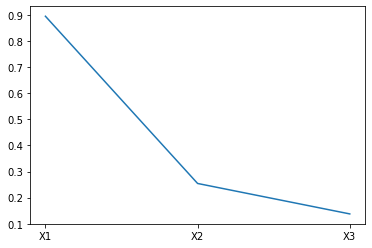

In [ ]:
plt.plot(tttb.index,tttb)

LASSO STAGE 1

In [ ]:
i=s.drop(['Y2'], axis=1)
i.corr()

,X1,X2,X3,Z1
X1,1.000000e+00,1.811051e-16,7.494005e-17,0.894236
X2,1.811051e-16,1.000000e+00,6.245005e-18,0.254285
X3,7.494005e-17,6.245005e-18,1.000000e+00,0.137738
Z1,8.942364e-01,2.542852e-01,1.377378e-01,1.000000


<AxesSubplot:>

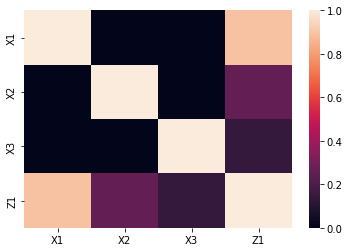

In [ ]:
sns.heatmap(i.corr())

In [ ]:
tb=i.corr()
ttb=tb.drop(['Z1'])
tttb=ttb['Z1']
tttb

X1    0.894236
X2    0.254285
X3    0.137738
Name: Z1, dtype: float64

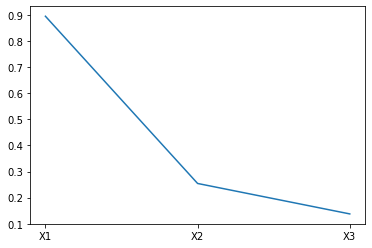

In [ ]:
plt.plot(tttb.index,tttb)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xs=s.drop(['Y2','Z1'],axis=1)
xs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      64 non-null     float64
 1   X2      64 non-null     float64
 2   X3      64 non-null     float64
dtypes: float64(3)
memory usage: 1.6 KB


In [ ]:
ys=i['Y2']
ys.describe()

count    64.000000
mean      0.506968
std       0.246548
min       0.000000
25%       0.396110
50%       0.445920
75%       0.729127
max       1.000000
Name: Y2, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xdf,ydf, test_size=0.2,random_state=0)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((51, 3), (51,), (13, 3), (13,))

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
regr = Lasso(alpha=1)
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)

In [ ]:
y_pred=regr.predict(x_test)

In [ ]:
from sklearn import metrics

In [ ]:
def print_metrics(y_test,pred,z):
    plt.scatter(y_test,y_pred)
    print('MAE : ',metrics.mean_absolute_error(y_test,y_pred))
    print('MSE : ',metrics.mean_squared_error(y_test,y_pred))
    print('RSME: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
    print('R2  : ',metrics.r2_score(y_test,y_pred))
    p=len(y_pred)
    r2=metrics.r2_score(y_test,y_pred)
    x1 = (1-r2)
    y1 = (p-1) / (p-z-1)
    ar2 = (1 - (x1 * y1))
    print('Adjusted R2 : ',ar2)

MAE :  0.18884605367471752
MSE :  0.05402015477069222
RSME:  0.2324223628885401
R2  :  -0.1906655432486961
Adjusted R2 :  -0.5875540576649281


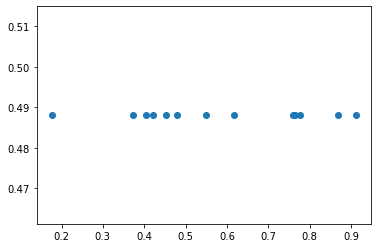

In [ ]:
print_metrics(y_test,y_pred,3)

LASSO REGRESSION STAGE 2

In [ ]:
x2s=df.drop(['X1','X2','X3','Z1'],axis=1)
y2s=df['Z1']
x2s.shape,y2s.shape

((64, 1), (64,))

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x2df,y2df, test_size=0.2,random_state=0)

In [ ]:
lasso = Lasso(alpha=1)
lasso.fit(x_train,y_train)
lasso_pred = lasso.predict(x_test)

MAE :  0.17506004231857922
MSE :  0.06017194678739885
RSME:  0.2452997080866564
R2  :  -0.06876304240976228
Adjusted R2 :  -0.42501738987968296


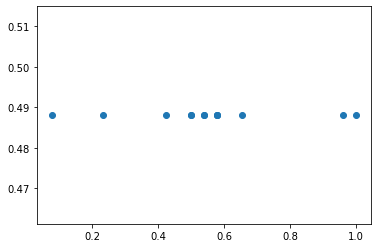

In [ ]:
print_metrics(y_test,lasso_pred,3)

Elastic net stage 1

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
x_elastic_train,x_elastic_test,y_elastic_train,y_elastic_test=train_test_split(x2df,y2df, test_size=0.2,random_state=0)

In [ ]:
regr = ElasticNet(random_state=0)
regr.fit(x_elastic_train,y_elastic_train)
y_pred3 = regr.predict(x_elastic_test)

In [ ]:
def print_metrics(y_test,pred,z):
    plt.scatter(y_test,y_pred3)
    print('MAE : ',metrics.mean_absolute_error(y_elastic_test,y_pred3))
    print('MSE : ',metrics.mean_squared_error(y_elastic_test,y_pred3))
    print('RSME: ',np.sqrt(metrics.mean_squared_error(y_elastic_test,y_pred3)))
    print('R2  : ',metrics.r2_score(y_elastic_test,y_pred3))
    p=len(y_pred3)
    r2=metrics.r2_score(y_elastic_test,y_pred3)
    x1 = (1-r2)
    y1 = (p-1) / (p-z-1)
    ar2 = (1 - (x1 * y1))
    print('Adjusted R2 : ',ar2)

MAE :  0.18366399814363615
MSE :  0.062415684454545255
RSME:  0.24983131199780634
R2  :  -0.10861589782727998
Adjusted R2 :  -0.47815453043637324


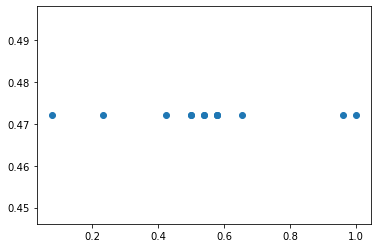

In [ ]:
print_metrics(y_elastic_test,y_pred3,3)

Elastic net stage 2

In [ ]:
x2y=df.drop(['X1','X2','X3','Z1'],axis=1)
y2y=s['Z1']
x2y.shape,y2df.shape

((64, 1), (64,))

In [ ]:
x_el_train,x_el_test,y_el_train,y_el_test=train_test_split(x2s,y2s, test_size=0.2,random_state=0)

In [ ]:
elastic = ElasticNet(random_state=0)
elastic.fit(x_el_train,y_el_train)
y_el_pred = elastic.predict(x_el_test)

MAE :  0.18366399814363615
MSE :  0.062415684454545255
RSME:  0.24983131199780634
R2  :  -0.10861589782727998
Adjusted R2 :  -0.20939916126612346


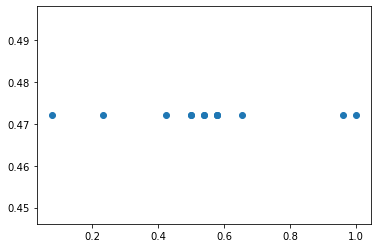

In [ ]:
def print_metrics(y_test,pred,z):
    plt.scatter(y_test,y_el_pred)
    print('MAE : ',metrics.mean_absolute_error(y_el_test,y_el_pred))
    print('MSE : ',metrics.mean_squared_error(y_el_test,y_el_pred))
    print('RSME: ',np.sqrt(metrics.mean_squared_error(y_el_test,y_el_pred)))
    print('R2  : ',metrics.r2_score(y_el_test,y_el_pred))
    p=len(y_el_pred)
    r2=metrics.r2_score(y_el_test,y_el_pred)
    x1 = (1-r2)
    y1 = (p-1) / (p-z-1)
    ar2 = (1 - (x1 * y1))
    print('Adjusted R2 : ',ar2)
print_metrics(y_el_test,y_el_pred,1)